In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot:>

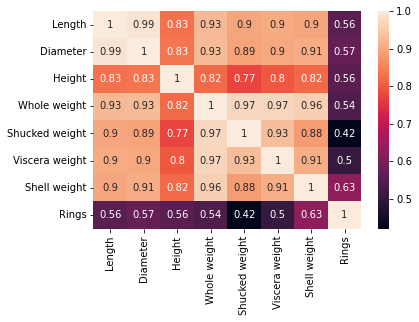

In [4]:
sns.heatmap(data.corr(),annot=True)


As target variable is rings:
Its highest corr is with Shell weight

And Lowest corr is with Shucked weight

With remaining columns it has good positive corr

In [5]:
data.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
data.isnull().sum()


Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

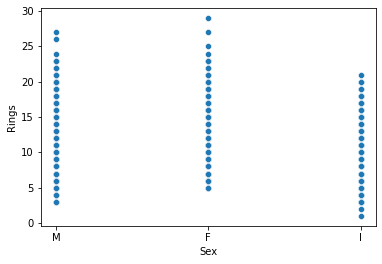

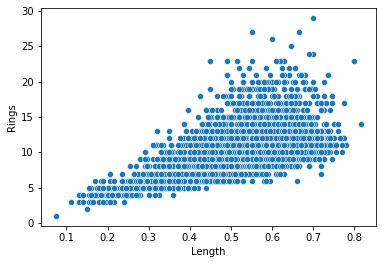

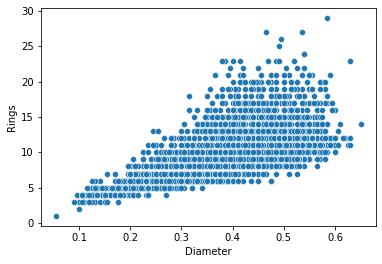

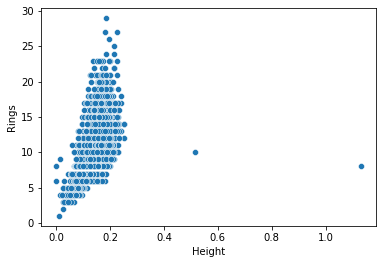

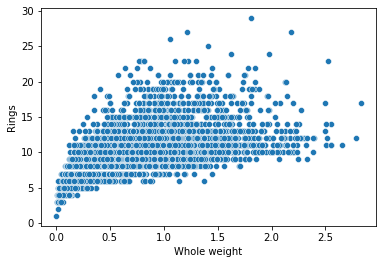

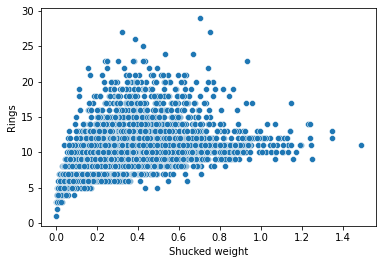

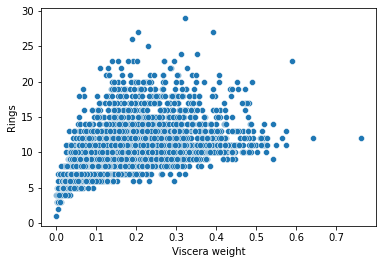

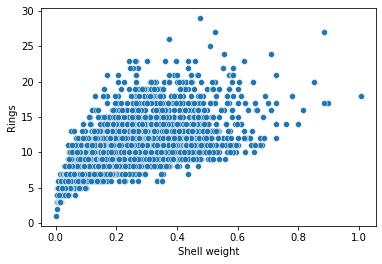

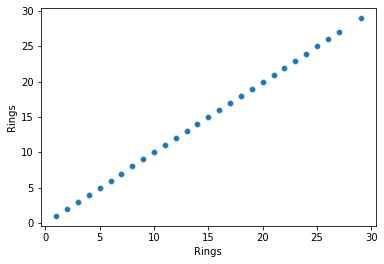

In [7]:
for i in data.columns:
    sns.scatterplot(x=i, y='Rings', data=data)
    plt.show()

In [8]:
numerical_feature = [i for i in data if data[i].dtypes!='O']


In [9]:
numerical_feature


['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

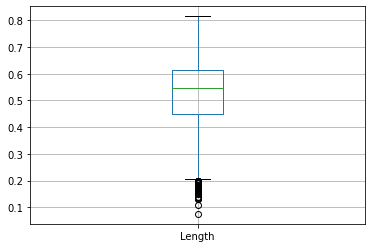

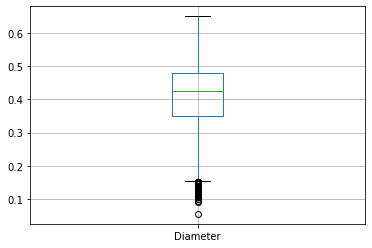

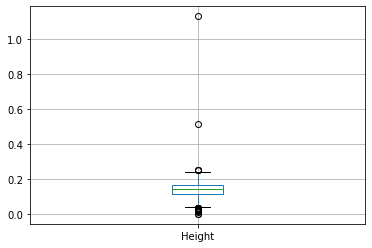

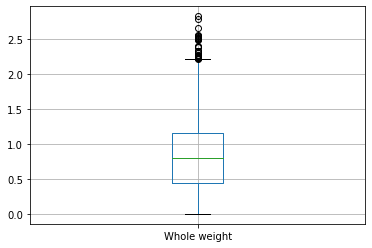

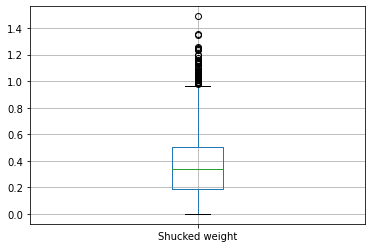

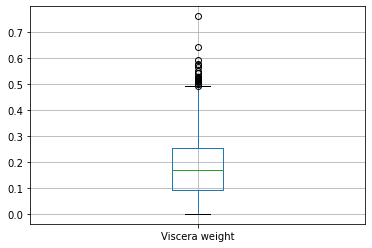

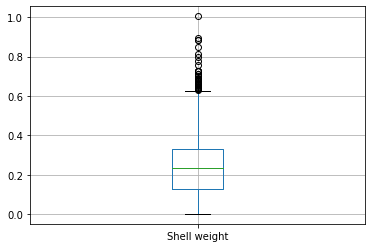

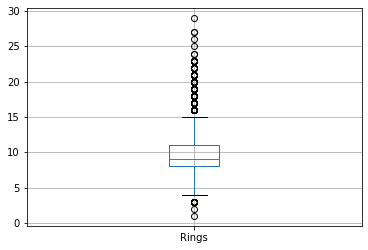

In [10]:
for i in numerical_feature:
    data.boxplot(i)
    plt.show()


In [11]:

for i in data.columns:
    col = pd.DataFrame(np.where(data[i] == ' ', 1, 0))
    
col.value_counts()

0    4177
dtype: int64

In [12]:
data_temp = data.drop('Sex',axis=1)

In [13]:
data['Length'] = np.log(data['Length'])
data['Diameter'] = np.log(data['Diameter'])
data['Whole weight'] = np.log(data['Whole weight'])
data['Shucked weight'] = np.log(data['Shucked weight'])
data['Viscera weight'] = np.log(data['Viscera weight'])
data['Shell weight'] = np.log(data['Shell weight'])

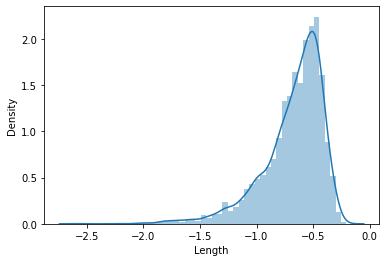

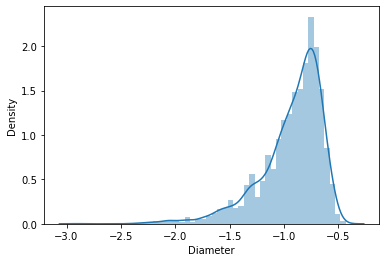

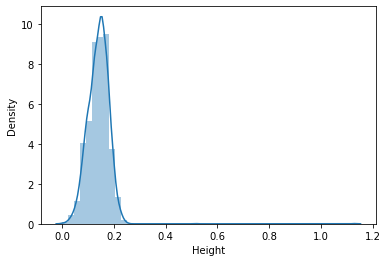

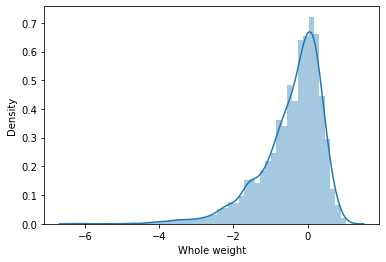

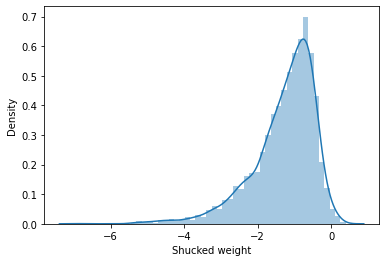

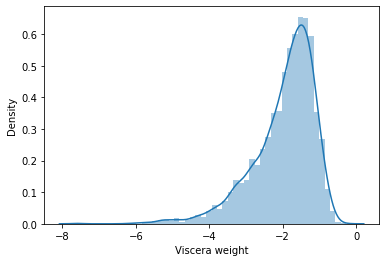

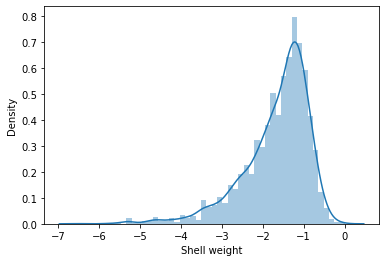

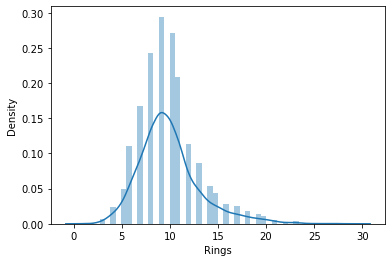

In [14]:
for i in numerical_feature:
    sns.distplot(data[i])
    plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

data['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data_sc = pd.DataFrame(min_max.fit_transform(data), columns = data.columns)

In [17]:
data_sc.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.0,0.755673,0.766332,0.084071,0.765042,0.741100,0.724533,0.707695,0.500000
1,1.0,0.645699,0.636691,0.079646,0.651452,0.629711,0.624409,0.590574,0.214286
2,0.0,0.819629,0.823165,0.119469,0.803018,0.759341,0.770555,0.759402,0.285714
3,1.0,0.741622,0.766332,0.110619,0.765578,0.735499,0.741059,0.712734,0.321429
4,0.5,0.621036,0.621115,0.070796,0.638312,0.615212,0.596392,0.553514,0.214286


In [18]:
data.drop(['Whole weight','Shucked weight'],axis=1,inplace=True)

In [19]:
x = data_sc.drop('Rings',axis=1)
y = data_sc['Rings']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [21]:
rscore = 0.8
msr = 0.3
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r_score = r2_score(y_test,pred)
    error = mean_squared_error(y_test,pred)
    print('random_state',i,r_score,error)

random_state 1 0.45718665848575146 0.0068014845209398616
random_state 2 0.5349392259279275 0.006568472347671382
random_state 3 0.49510902835227033 0.006116199924907985
random_state 4 0.536500224660472 0.005847489961229682
random_state 5 0.5117529844571829 0.0064524162768314665
random_state 6 0.5533479718160433 0.0061509575463063225
random_state 7 0.5385889911858256 0.006708428826312691
random_state 8 0.5226409992610062 0.006226193704902203
random_state 9 0.5104878013366826 0.006452022070609902
random_state 10 0.5096194459949477 0.0067182939602473575
random_state 11 0.5713972943456265 0.005846577170168074
random_state 12 0.5471824187886285 0.006032643400152326
random_state 13 0.5359429137090206 0.005979809730882104
random_state 14 0.5137392294722025 0.006644372928565813
random_state 15 0.46704160508013504 0.006939595604785452
random_state 16 0.5410513643685786 0.005951158693942424
random_state 17 0.5336752278042114 0.006300241219867488
random_state 18 0.5350099883019992 0.00649426711803

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 11)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [24]:
list_algo = [LinearRegression,SVR,DecisionTreeRegressor,KNeighborsRegressor]


In [25]:
for i in list_algo:
    obj = i()
    obj.fit(x_train,y_train)
    pred = obj.predict(x_test)
    print(i,r2_score(y_test,pred))
    print(mean_squared_error(y_test,pred))
    print('---------')

<class 'sklearn.linear_model._base.LinearRegression'> 0.5713972943456265
0.005846577170168074
---------
<class 'sklearn.svm._classes.SVR'> 0.5483212524962597
0.006161357869576788
---------
<class 'sklearn.tree._classes.DecisionTreeRegressor'> 0.06562306235712767
0.012745852510692454
---------
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> 0.5140155016346883
0.006629323230379896
---------


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.5713972943456265
0.005846577170168074


In [28]:
for i in range(2,11):
    cross_score = cross_val_score(lr, x, y, cv = i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

cv... 2
0.5235559458362219
-------
cv... 3
0.5076554351913017
-------
cv... 4
0.41047445513967573
-------
cv... 5
0.4186579277342067
-------
cv... 6
0.41771652988690305
-------
cv... 7
0.4477963334782756
-------
cv... 8
0.36824972135542333
-------
cv... 9
0.4235110761258442
-------
cv... 10
0.3505223780759503
-------


In [29]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=lr,step=1)
rfe = rfe.fit(x_train,y_train)
selected_feature = pd.DataFrame({'features':list(x_train.columns),'ranking':rfe.ranking_})

selected_feature

,features,ranking
0,Sex,5
1,Length,1
2,Diameter,4
3,Height,3
4,Whole weight,1
5,Shucked weight,1
6,Viscera weight,2
7,Shell weight,1


In [30]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
rfe_model = lr.fit(x_train_rfe,y_train)

In [31]:
p = rfe_model.predict(x_test_rfe)

In [32]:
mean_squared_error(p,y_test)


0.005947081198348438

In [33]:
x_train_rfe

array([[0.77370444, 0.75830894, 0.73739182, 0.70354174],
       [0.85012711, 0.88020027, 0.84340159, 0.85054095],
       [0.80759475, 0.80322134, 0.79832063, 0.67211799],
       ...,
       [0.5446129 , 0.53371631, 0.49429499, 0.46036644],
       [0.85741711, 0.83069325, 0.79004688, 0.78277744],
       [0.89539208, 0.89185178, 0.8742936 , 0.83569191]])

In [34]:
svr = SVR()
svr.fit(x_train,y_train)
pred = svr.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))
for i in range(2,11):
    cross_score = cross_val_score(svr,x,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

0.5483212524962597
0.006161357869576788
cv... 2
0.5213103237890548
-------
cv... 3
0.5062608453388661
-------
cv... 4
0.41399678748038005
-------
cv... 5
0.39020279846280903
-------
cv... 6
0.40224561183762414
-------
cv... 7
0.43505353737187963
-------
cv... 8
0.360400470548092
-------
cv... 9
0.39480169819825267
-------
cv... 10
0.3165694765947056
-------


In [35]:
k_n = KNeighborsRegressor()
k_n.fit(x_train,y_train)
pred = k_n.predict(x_test)
print(r2_score(y_test,pred))
print(mean_squared_error(y_test,pred))

0.5140155016346883
0.006629323230379896


In [36]:
for i in range(2,11):
    cross_score = cross_val_score(svr,x,y,cv=i)
    print('cv...',i)
    print(cross_score.mean())
    print('-------')

cv... 2
0.5213103237890548
-------
cv... 3
0.5062608453388661
-------
cv... 4
0.41399678748038005
-------
cv... 5
0.39020279846280903
-------
cv... 6
0.40224561183762414
-------
cv... 7
0.43505353737187963
-------
cv... 8
0.360400470548092
-------
cv... 9
0.39480169819825267
-------
cv... 10
0.3165694765947056
-------


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(r2_score(y_test, pred_rf))
print(mean_squared_error(y_test, pred_rf))

0.562476778427326
0.005968262087285965


In [39]:
from sklearn.ensemble import AdaBoostRegressor

In [40]:
ada = AdaBoostRegressor(n_estimators=100,base_estimator=lr)
ada.fit(x_train, y_train)
pred_ada = ada.predict(x_test)
print(r2_score(y_test, pred_ada))
print(mean_squared_error(y_test, pred_ada))

0.4708769574914424
0.00721777688224642


In [41]:
import pickle
abalone_file = 'pickl.pkl'
pickle.dump(rf,open(abalone_file,'wb'))